In [1]:
pip install sunpy astropy parfive beautifulsoup4 lxml zeep drms

In [3]:
pip install reproject

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.4 MB/s eta 0:00:00


In [5]:
pip install mpl_animators

In [6]:
import os
import random
import shutil
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from sunpy.net import Fido, attrs as a
from sunpy.io import read_file
from sunpy.map import Map
import astropy.units as u

# Step 1: Create output directories
os.makedirs("extracted_images", exist_ok=True)

# Step 2: Generate random dates
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 8, 31)
num_samples = 20

random_dates = sorted([
    start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
    for _ in range(num_samples)
])

meta_data = []

# Step 3: Download + extract + save
for date in tqdm(random_dates, desc="Fetching images"):
    try:
        # Fixed time for each date
        date = date.replace(hour=12, minute=0, second=0)
        start_time = date.strftime('%Y-%m-%dT%H:%M:%S')
        end_time = (date + timedelta(hours=2)).strftime('%Y-%m-%dT%H:%M:%S')

        # Search for AIA 171 Å image
        result = Fido.search(
            a.Time(start_time, end_time),
            a.Instrument.aia,
            a.Wavelength(171 * u.angstrom)
        )

        if len(result) == 0 or result.file_num == 0:
            print(f"No image found at {start_time}")
            continue

        # Download first available image
        downloaded = Fido.fetch(result[0, 0])
        fits_file = downloaded[0]

        # Read the FITS file
        smap = Map(fits_file)
        header = smap.meta

        # Convert image data to 8-bit for PNG
        image_data = smap.data
        image_data = np.nan_to_num(image_data)  # remove NaNs
        norm_data = (255 * (image_data - np.min(image_data)) / (np.ptp(image_data))).astype(np.uint8)

        # Save PNG
        filename_base = os.path.splitext(os.path.basename(fits_file))[0]
        png_path = f"extracted_images/{filename_base}.png"
        plt.imsave(png_path, norm_data, cmap='gray')

        # Store metadata
        meta_data.append({
            "date_obs": header.get("date-obs", ""),
            "wavelength": header.get("wavelnth", ""),
            "exposure_time": header.get("exptime", ""),
            "instrument": header.get("instrume", ""),
            "telescope": header.get("telescop", ""),
            "detector": header.get("detector", ""),
            "obs_type": header.get("obstype", ""),
            "x_scale": header.get("cdelt1", ""),
            "y_scale": header.get("cdelt2", ""),
            "obs_title": header.get("obs_id", ""),
            "image_path": png_path
        })

    except Exception as e:
        print(f"Error on {date}: {e}")

# Step 4: Save metadata to CSV
df = pd.DataFrame(meta_data)
df.to_csv("aia_images_metadata.csv", index=False)
print("✅ All images saved to 'extracted_images/' and metadata to 'aia_images_metadata.csv'")


Fetching images:   0%|          | 0/20 [00:00<?, ?it/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_01_13T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

Fetching images:   5%|▌         | 1/20 [00:24<07:40, 24.24s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_01_14T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

Fetching images:  10%|█         | 2/20 [00:47<07:07, 23.72s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_02_06T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

Fetching images:  15%|█▌        | 3/20 [01:11<06:47, 23.98s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_03_04T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.3M [00:00<?, ?B/s]

Fetching images:  20%|██        | 4/20 [01:57<08:40, 32.56s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_03_17T12_00_09.34Z.image_lev1.fits:   0%|          | 0.00/12.1M [00:00<?, ?B/s]

Fetching images:  25%|██▌       | 5/20 [02:21<07:23, 29.55s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_03_26T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.1M [00:00<?, ?B/s]

Fetching images:  30%|███       | 6/20 [02:46<06:28, 27.78s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_04_01T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.2M [00:00<?, ?B/s]

Fetching images:  35%|███▌      | 7/20 [03:11<05:50, 26.93s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_04_05T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.1M [00:00<?, ?B/s]

Fetching images:  40%|████      | 8/20 [03:34<05:09, 25.75s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_05_11T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/11.9M [00:00<?, ?B/s]

Fetching images:  45%|████▌     | 9/20 [04:20<05:51, 31.99s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_06_13T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Fetching images:  50%|█████     | 10/20 [04:44<04:55, 29.53s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_06_15T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Fetching images:  55%|█████▌    | 11/20 [05:08<04:11, 27.91s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_06_24T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Fetching images:  60%|██████    | 12/20 [05:31<03:30, 26.27s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_06_25T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Fetching images:  65%|██████▌   | 13/20 [05:54<02:57, 25.36s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_06_26T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Fetching images:  70%|███████   | 14/20 [06:17<02:27, 24.63s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_07_13T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Fetching images:  75%|███████▌  | 15/20 [06:40<02:00, 24.08s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Fetching images:  80%|████████  | 16/20 [06:57<01:28, 22.07s/it]Exception ignored in: <function BaseEventLoop.__del__ at 0x7c2d61b86de0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/asyncio/base_events.py", line 695, in __del__
    self.close()
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/usr/lib/python3.11/signal.py", line 58, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_07_16T12_00_09.34Z.image_lev1.fits:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Fetching images:  85%|████████▌ | 17/20 [07:21<01:08, 22.79s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_07_20T12_00_09.34Z.image_lev1.fits:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Fetching images:  90%|█████████ | 18/20 [07:45<00:46, 23.04s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_07_21T12_00_09.35Z.image_lev1.fits:   0%|          | 0.00/12.1M [00:00<?, ?B/s]

Fetching images:  95%|█████████▌| 19/20 [08:35<00:31, 31.05s/it]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.171A_2023_08_29T12_00_09.34Z.image_lev1.fits:   0%|          | 0.00/11.9M [00:00<?, ?B/s]

Fetching images: 100%|██████████| 20/20 [09:00<00:00, 27.01s/it]

✅ All images saved to 'extracted_images/' and metadata to 'aia_images_metadata.csv'


In [7]:
import shutil
import os
from pathlib import Path
import sunpy

# Step 1: Get SunPy cache path programmatically (works on any OS)
sunpy_cache_path = Path(sunpy.config.get('downloads', 'download_dir')).expanduser()

# Step 2: Set your destination folder
destination_path = Path("aia_fits_files")
destination_path.mkdir(exist_ok=True)

# Step 3: Copy all .fits files
fits_files = list(sunpy_cache_path.rglob("*.fits"))
print(f"Total FITS files found: {len(fits_files)}")

for file in fits_files:
    try:
        shutil.copy(file, destination_path / file.name)
    except Exception as e:
        print(f"Error copying {file.name}: {e}")

print(f"✅ All FITS files copied to '{destination_path}/'")


Total FITS files found: 19
✅ All FITS files copied to 'aia_fits_files/'


In [8]:
import sunpy.map
import sunpy
from pathlib import Path
import matplotlib.pyplot as plt

# Step 1: Locate SunPy cache folder
fits_dir = Path(sunpy.config.get('downloads', 'download_dir')).expanduser()

# Step 2: Set output directory
output_dir = Path("converted_frames")
output_dir.mkdir(exist_ok=True)

# Step 3: Find all FITS files
fits_files = sorted(fits_dir.rglob("*.fits"))
print(f"Total FITS files found: {len(fits_files)}")

# Step 4: Convert to PNG
for i, fits_file in enumerate(fits_files):
    try:
        aia_map = sunpy.map.Map(fits_file)

        fig = plt.figure(figsize=(6, 6))
        aia_map.plot()
        plt.axis('off')
        plt.tight_layout()

        png_filename = output_dir / f"frame_{i:03d}.png"
        plt.savefig(png_filename, bbox_inches='tight', pad_inches=0)
        plt.close(fig)

        print(f"✅ Saved: {png_filename}")

    except Exception as e:
        print(f"❌ Error with {fits_file.name}: {e}")


Total FITS files found: 19
✅ Saved: converted_frames/frame_000.png
✅ Saved: converted_frames/frame_001.png
✅ Saved: converted_frames/frame_002.png
✅ Saved: converted_frames/frame_003.png
✅ Saved: converted_frames/frame_004.png
✅ Saved: converted_frames/frame_005.png
✅ Saved: converted_frames/frame_006.png
✅ Saved: converted_frames/frame_007.png
✅ Saved: converted_frames/frame_008.png
✅ Saved: converted_frames/frame_009.png
✅ Saved: converted_frames/frame_010.png
✅ Saved: converted_frames/frame_011.png
✅ Saved: converted_frames/frame_012.png
✅ Saved: converted_frames/frame_013.png
✅ Saved: converted_frames/frame_014.png
✅ Saved: converted_frames/frame_015.png
✅ Saved: converted_frames/frame_016.png
✅ Saved: converted_frames/frame_017.png
✅ Saved: converted_frames/frame_018.png


In [9]:
import numpy as np
import cv2
from astropy.io import fits
from glob import glob
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
import sunpy

# Step 1: Get SunPy cache path
fits_dir = Path(sunpy.config.get('downloads', 'download_dir')).expanduser()
files = sorted([str(f) for f in fits_dir.rglob("*.fits")])

print(f"Total FITS files found: {len(files)}")

# Step 2: Preprocess
images = []

for file in files:
    try:
        with fits.open(file) as hdul:
            # AIA image usually in 2nd HDU
            data = hdul[1].data if len(hdul) > 1 else hdul[0].data

        # Handle NaNs
        data = np.nan_to_num(data)

        # Normalize 0–1
        data_scaled = MinMaxScaler().fit_transform(data)

        # Resize to 224x224
        resized = cv2.resize(data_scaled, (224, 224))
        images.append(resized)

    except Exception as e:
        print(f"❌ Error loading {file}: {e}")

# Final array
images = np.array(images)
images = images[..., np.newaxis]  # Add channel dimension for CNN

print("✅ Loaded and preprocessed:", images.shape)


Total FITS files found: 19
✅ Loaded and preprocessed: (19, 224, 224, 1)


In [10]:
# CNN Feature Extraction
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten

input_layer = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

cnn_model = Model(inputs=input_layer, outputs=x)
features = cnn_model.predict(images)
print(" Features extracted:", features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step
 Features extracted: (19, 100352)


In [12]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

# Set n_components to a value less than or equal to the number of samples (19)
# For example, setting it to the minimum of samples and features
pca = PCA(n_components=min(features.shape[0], features.shape[1]))
features_reduced = pca.fit_transform(features)
print("Features after PCA:", features_reduced.shape)

Features after PCA: (19, 19)


In [13]:
# KMeans Clustering (Unsupervised)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_reduced)
print(" Cluster labels assigned:", np.unique(cluster_labels))

 Cluster labels assigned: [0 1 2]


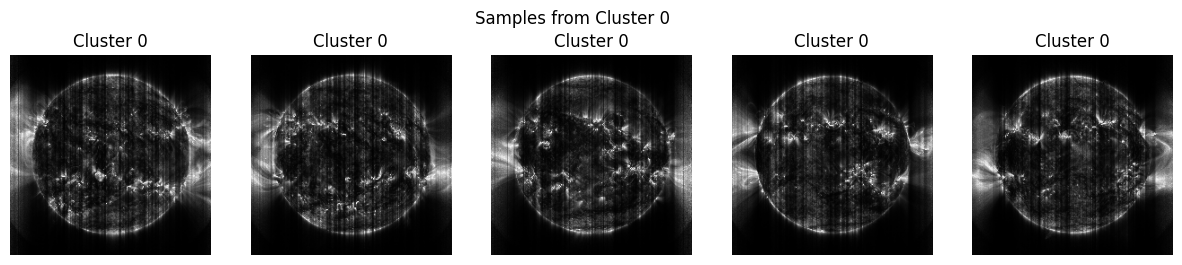

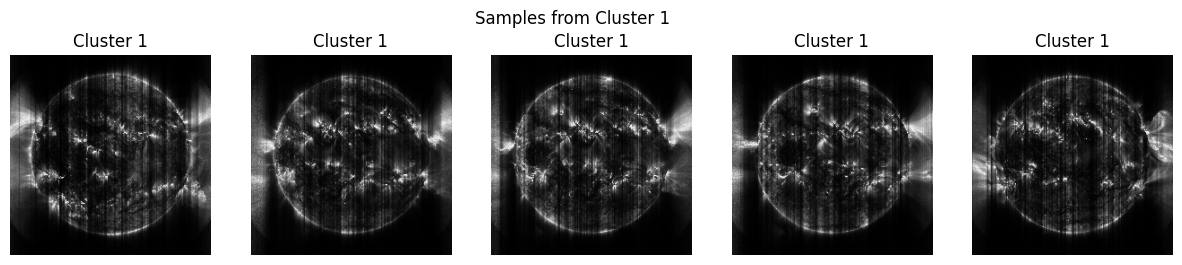

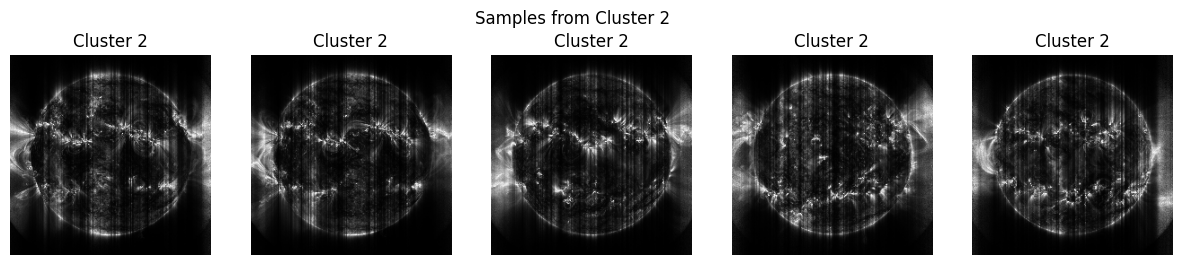

In [14]:
# Visualize a few from each cluster
for cluster in range(3):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    idxs = np.where(cluster_labels == cluster)[0][:5]
    for i, idx in enumerate(idxs):
        axes[i].imshow(images[idx].squeeze(), cmap='gray')
        axes[i].set_title(f"Cluster {cluster}")
        axes[i].axis('off')
    plt.suptitle(f"Samples from Cluster {cluster}")
    plt.show()


In [15]:
# Manually Assign Cluster Labels
# Cluster 0 → No Event → label 0
# Cluster 1 → Flare     → label 1
# Cluster 2 → CME       → label 2
cluster_to_label = {0: 0, 1: 1, 2: 2}
y_labels = np.array([cluster_to_label[c] for c in cluster_labels])

In [16]:
# Train a CNN Classifier
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.3, random_state=42, stratify=y_labels)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, validation_split=0.15, epochs=5, batch_size=8)
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.3, random_state=42, stratify=y_labels)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, validation_split=0.15, epochs=5, batch_size=8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4697 - loss: 1.0446 - val_accuracy: 0.5000 - val_loss: 4.5395
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 938ms/step - accuracy: 0.5720 - loss: 1.9088 - val_accuracy: 0.0000e+00 - val_loss: 2.1341
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 891ms/step - accuracy: 1.0000 - loss: 0.1392 - val_accuracy: 0.0000e+00 - val_loss: 3.1306
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 800ms/step - accuracy: 1.0000 - loss: 0.1774 - val_accuracy: 0.0000e+00 - val_loss: 1.7849
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 832ms/step - accuracy: 1.0000 - loss: 0.0476 - val_accuracy: 0.5000 - val_loss: 1.8597


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1629 - loss: 2.3217 - val_accuracy: 0.0000e+00 - val_loss: 6.6556
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 859ms/step - accuracy: 0.4091 - loss: 1.8873 - val_accuracy: 0.0000e+00 - val_loss: 2.6329
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 805ms/step - accuracy: 0.7955 - loss: 0.5162 - val_accuracy: 0.5000 - val_loss: 1.2073
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 829ms/step - accuracy: 0.7348 - loss: 0.4873 - val_accuracy: 0.5000 - val_loss: 1.1172
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.3016 - val_accuracy: 0.0000e+00 - val_loss: 2.0145


In [17]:
# Evaluate on Test Set
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.6667 - loss: 1.1435
Test Accuracy: 0.6666666865348816


In [18]:
# Predict a New Frame
pred = model.predict(images[:1])  # Example on first image
print("Predicted Class (0=No Event, 1=Flare, 2=CME):", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Class (0=No Event, 1=Flare, 2=CME): 2
